In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_csv('train.csv')


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


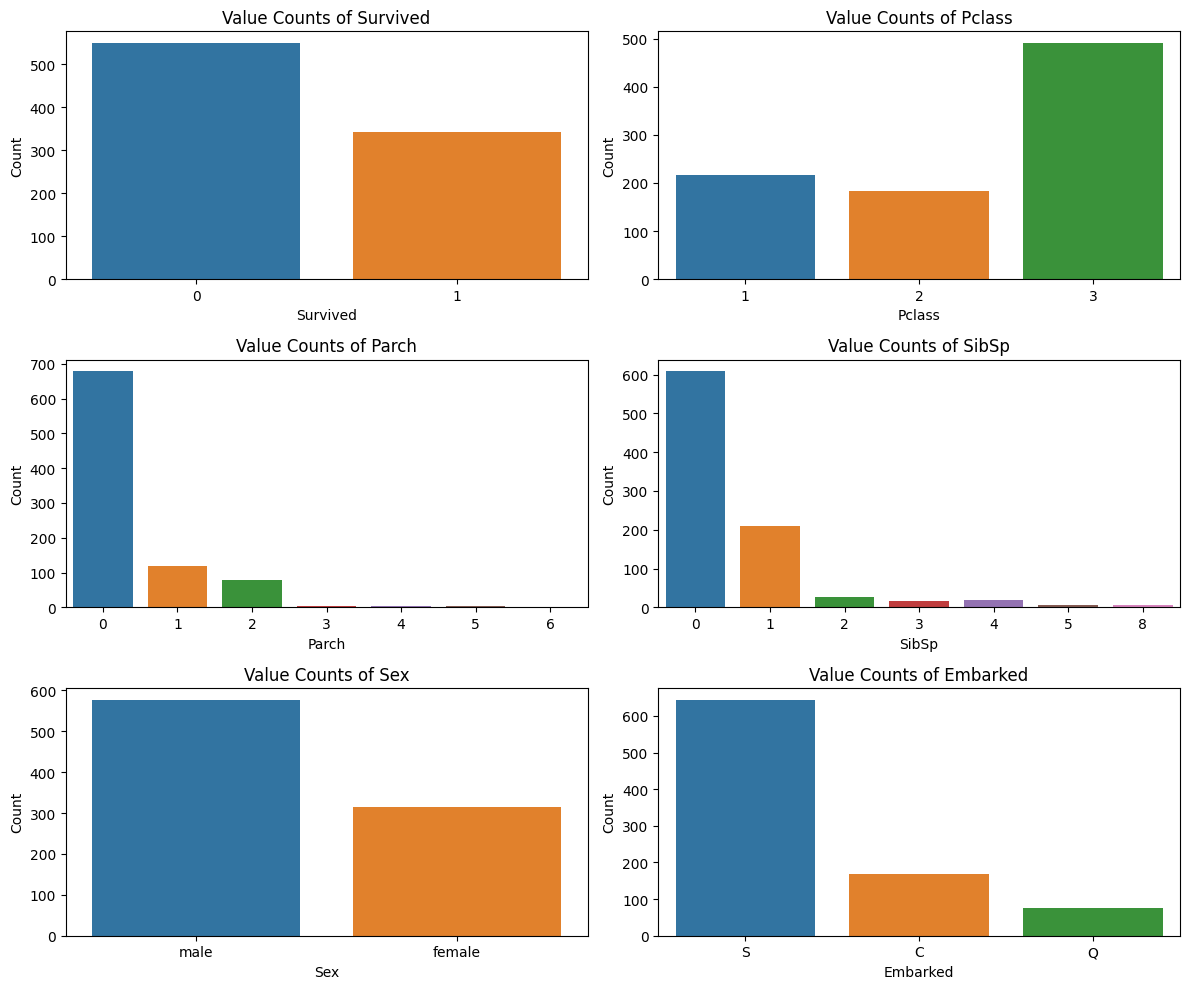

In [4]:
columns_to_plot = ['Survived', 'Pclass', 'Parch', 'SibSp', 'Sex', 'Embarked']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Plot count plots for each column
for i, ax in enumerate(axes.flatten()):
    if i < len(columns_to_plot):
        sns.countplot(x=df[columns_to_plot[i]], ax=ax)
        ax.set_title(f'Value Counts of {columns_to_plot[i]}')
        ax.set_xlabel(columns_to_plot[i])
        ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

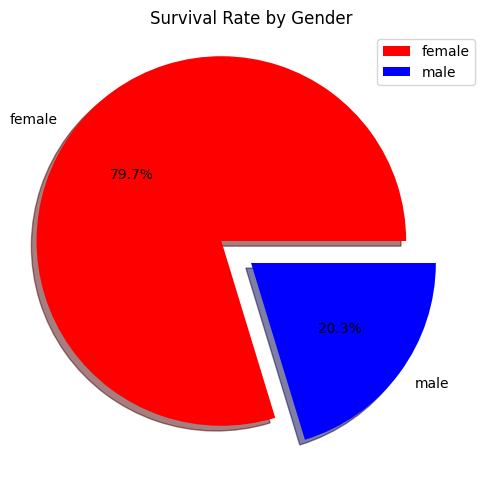

In [5]:
# Pie chart for survival rate by gender
survived_gender = df.groupby(['Sex'])['Survived'].mean()
plt.figure(figsize=(8, 6))
plt.pie(survived_gender, labels=survived_gender.index, autopct='%1.1f%%', colors=['red', 'blue'], explode=(0.2, 0), shadow=True)
plt.title('Survival Rate by Gender')
plt.legend()
plt.show()

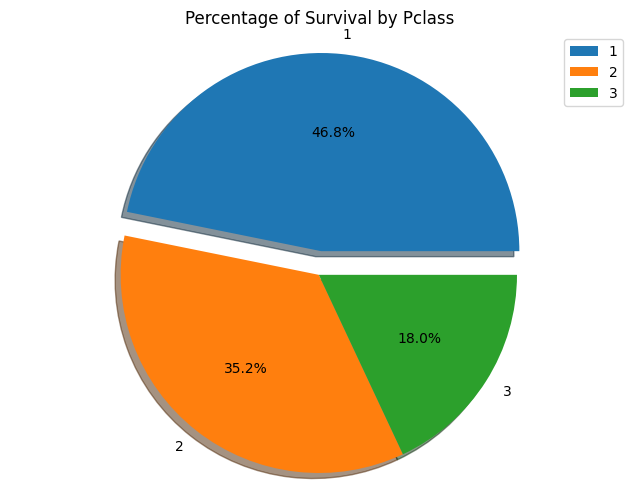

In [6]:
# Pie chart for survival rate by Pclass
survived_pclass = df.groupby(['Pclass'])['Survived'].mean()
plt.figure(figsize=(8, 6))
plt.pie(survived_pclass, labels=survived_pclass.index, autopct='%1.1f%%', explode=(0.12, 0, 0), shadow=True)
plt.title('Percentage of Survival by Pclass')
plt.axis('equal')
plt.legend()
plt.show()

/var/folders/tc/sb8llqc10l91r0ty_0t6lfxh0000gn/T/ipykernel_62177/702067465.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_age = df.groupby(['AgeGroup'])['Survived'].mean()


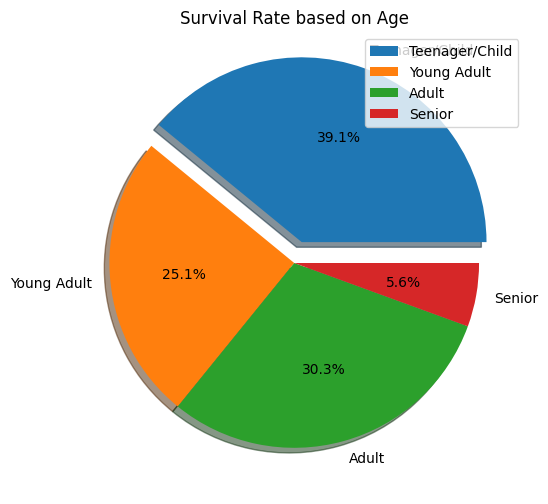

In [7]:
# Age group categorization and survival rate analysis
bins = [0, 18, 29, 64, 100]
labels = ['Teenager/Child', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
survived_age = df.groupby(['AgeGroup'])['Survived'].mean()
plt.figure(figsize=(10, 6))
plt.pie(survived_age, labels=survived_age.index, autopct='%1.1f%%', explode=(0.12, 0, 0, 0), shadow=True)
plt.title('Survival Rate based on Age')
plt.legend()
plt.show()

In [8]:
le = LabelEncoder()
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df.dropna(subset=['Embarked'], inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = le.fit_transform(df['Embarked'])
df['AgeGroup'] = le.fit_transform(df['AgeGroup'])

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare    Cabin  Embarked  AgeGroup  
0         A/5 21171   7.2500  Unknown         2         3  
1          PC 17599  71.2833      C85         0         0  
2  STON/O2. 3101282   7.9250  Unknown         2         3  
3            113803  53.1000     C123         2         

In [9]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [10]:
x = df[['Age','Sex','Pclass']]
y = df['Survived']

In [12]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.56367407, -0.73534203,  0.82520863],
       [ 0.66921696,  1.35991138, -1.57221121],
       [-0.25545131,  1.35991138,  0.82520863],
       ...,
       [-0.10133993,  1.35991138,  0.82520863],
       [-0.25545131, -0.73534203, -1.57221121],
       [ 0.20688282, -0.73534203,  0.82520863]])

In [13]:
# Define the model parameters
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5, 10]
        }
    }
}

# Perform grid search for each model
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_scaled, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

# Create a DataFrame with the results
results_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(results_df)

                 model  best_score                best_params
0                  svm    0.795302  {'C': 1, 'kernel': 'rbf'}
1        random_forest    0.808786       {'n_estimators': 10}
2  logistic_regression    0.786282                   {'C': 1}


In [14]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Train the best model (assuming SVC with best parameters from grid search)
model = SVC(C=1, kernel='rbf', gamma='auto')
model.fit(x_train, y_train)
model.predict(x_test) == y_test

281     True
435     True
39      True
418     True
585     True
       ...  
433     True
807    False
25     False
85     False
10      True
Name: Survived, Length: 178, dtype: bool

In [29]:
print(model.predict([[22,0,3]]))
print(model.predict([[2,0,3]]))

[0]
[0]


In [15]:
# Evaluate the model
print("Training set evaluation:")
print(classification_report(y_train, model.predict(x_train)))
print("Test set evaluation:")
print(classification_report(y_test, model.predict(x_test)))


Training set evaluation:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       440
           1       0.78      0.69      0.73       271

    accuracy                           0.81       711
   macro avg       0.80      0.79      0.79       711
weighted avg       0.81      0.81      0.81       711

Test set evaluation:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.75      0.75      0.75        69

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [19]:

# Confusion matrix
cm = confusion_matrix(y_test, model.predict(x_test))
cm

array([[92, 17],
       [17, 52]])